# main_executable.py

In [2]:
# from PySide6.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QFileDialog
# from PySide6.QtGui import QPixmap
# from PySide6.QtCore import Qt
# from Filtering_function import apply_filter
# import sys

import sys
import os
import PySide6
os.environ["QT_PLUGIN_PATH"] = os.path.join(os.path.dirname(PySide6.__file__), "plugins")

from PySide6.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QFileDialog
from PySide6.QtGui import QPixmap, QImage
from PySide6.QtCore import Qt
from Filtering_function import apply_filter

class ImageProcessorApp(QWidget):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Image Processor")
        self.setStyleSheet("background-color: black;")

        self.layout = QVBoxLayout()
        self.label = QLabel("Drag and drop an image here or click to select.", self)
        self.label.setAlignment(Qt.AlignCenter)
        self.label.setStyleSheet("color: white; font-size: 16px;")
        
        self.layout.addWidget(self.label)
        self.setLayout(self.layout)
        
        self.setAcceptDrops(True)
        self.resize(600, 600)  # Ventana cuadrada al iniciar
        
    def dragEnterEvent(self, event):
        if event.mimeData().hasUrls():
            event.accept()
        else:
            event.ignore()
        
    def dropEvent(self, event):
        for url in event.mimeData().urls():
            file_path = url.toLocalFile()
            self.process_image(file_path)
        
    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            file_path, _ = QFileDialog.getOpenFileName(self, "Select an Image", "", "Image Files (*.png *.jpg *.jpeg *.bmp *.gif)")
            if file_path:
                self.process_image(file_path)
        
    def process_image(self, file_path):
        print(f"Processing image: {file_path}")
        try:
            result = apply_filter(file_path, max_area=256*256)
            self.display_output(result)
        except Exception as e:
            print(f"Error processing image: {e}")
        
    def display_output(self, result):
        processed_image = result.processed_image.convert("RGB")
                
        # Convert processed_image to QImage
        qimage = QImage(processed_image.tobytes(), processed_image.width, processed_image.height, QImage.Format_RGB888)
        
        # Now use QPixmap.fromImage with the correct argument type
        pixmap = QPixmap.fromImage(qimage)
        
        self.label.setPixmap(pixmap)
        self.label.setScaledContents(True)

if __name__ == "__main__":
    if not QApplication.instance():
        app = QApplication(sys.argv)
    else:
        app = QApplication.instance()
    
    window = ImageProcessorApp()
    window.show()
    app.exec()

Processing image: C:/Users/User/Pictures/IMG_20240216_161200_887col1.jpg


In [2]:
# import os
# import PySide6
# os.environ["QT_PLUGIN_PATH"] = os.path.join(os.path.dirname(PySide6.__file__), "plugins")


In [1]:
import sys
import os
import PySide6
os.environ["QT_PLUGIN_PATH"] = os.path.join(os.path.dirname(PySide6.__file__), "plugins")

from PySide6.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QFileDialog
from PySide6.QtGui import QPixmap
from PySide6.QtCore import Qt
from Filtering_function import apply_filter


In [1]:
#execute from file

! main_executable.py

Traceback (most recent call last):
  File "C:\Users\User\Projects_Unprotected\Side_quest_gameoflife\Executable_exp\main_executable.py", line 1, in <module>
    from PySide6.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QFileDialog
ModuleNotFoundError: No module named 'PySide6'


In [7]:
!pip show pillow

from PIL import Image, ImageOps

Name: pillow
Version: 11.1.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: C:\Users\User\.conda\envs\MiguelEnvHaB\Lib\site-packages
Requires: 
Required-by: imageio, imgviz, labelme, matplotlib, scikit-image, streamlit, streamlit-drawable-canvas, torchvision, ultralytics, visualize, wordcloud


# Filtering_function.py

In [ ]:
# from PIL import Image, ImageFilter, ImageOps

# class FilterResult:
#     def __init__(self, original_image, processed_image, metadata):
#         """
#         Clase para encapsular el resultado del filtrado de una imagen.

#         Args:
#             original_image (PIL.Image.Image): Imagen original.
#             processed_image (PIL.Image.Image): Imagen procesada.
#             metadata (dict): Información adicional sobre el filtrado.
#         """
#         self.original_image = original_image
#         self.processed_image = processed_image
#         self.metadata = metadata

#     def save(self, output_path):
#         """Guarda la imagen procesada en el path especificado."""
#         self.processed_image.save(output_path)


# def apply_filter(image_path, filter_type="grayscale"):
#     """
#     Aplica un filtro especificado a la imagen proporcionada.

#     Args:
#         image_path (str): Ruta del archivo de la imagen a procesar.
#         filter_type (str): Tipo de filtro a aplicar (e.g., "grayscale", "blur", "invert").

#     Returns:
#         FilterResult: Resultado del filtrado que incluye la imagen original, la procesada y metadata.
#     """
#     try:
#         # Cargar la imagen
#         original_image = Image.open(image_path)
#         processed_image = None
#         metadata = {
#             "filter_type": filter_type,
#             "original_size": original_image.size,
#             "mode": original_image.mode
#         }

#         # Aplicar filtro
#         if filter_type == "grayscale":
#             processed_image = ImageOps.grayscale(original_image)
#         elif filter_type == "blur":
#             processed_image = original_image.filter(ImageFilter.BLUR)
#         elif filter_type == "invert":
#             if original_image.mode != "RGB":
#                 original_image = original_image.convert("RGB")
#             processed_image = ImageOps.invert(original_image)
#         else:
#             raise ValueError(f"Filtro no reconocido: {filter_type}")

#         metadata["processed_size"] = processed_image.size
#         return FilterResult(original_image, processed_image, metadata)

#     except Exception as e:
#         print(f"Error al procesar la imagen: {e}")
#         raise


In [1]:
import sys
sys.path.append(r"C:\Users\User\Projects_Unprotected") # Add the path to the directory containing filtering_function.py

In [1]:
# Import the apply_filter function
# import Filtering_function
# Imports necesarios para ejecutar el código
from Filtering_function import apply_filter  # Para aplicar los filtros a la imagen

help(apply_filter)


Help on function apply_filter in module Filtering_function:

apply_filter(image_path, filter_type='grayscale', max_resolution=(256, 256))
    Aplica un filtro especificado a la imagen proporcionada y redimensiona si excede el tamaño máximo permitido.

    Args:
        image_path (str): Ruta del archivo de la imagen a procesar.
        filter_type (str): Tipo de filtro a aplicar (e.g., "grayscale", "blur", "invert").
        max_resolution (tuple): Resolución máxima permitida para la imagen (ancho, alto).

    Returns:
        FilterResult: Resultado del filtrado que incluye la imagen original, la procesada y metadata.



In [2]:

# Define the path to your image file
image_path = r"C:\Users\User\Pictures\Portafolio en bruto\deflation002g.jpg"  # Replace with the actual path to your image

# Apply a grayscale filter
print("Testing grayscale filter...")
grayscale_result = apply_filter(image_path, filter_type="grayscale")
grayscale_result.processed_image.show(title="Grayscale Filter")
print("Metadata:", grayscale_result.metadata)

# Apply a blur filter
print("\nTesting blur filter...")
blur_result = apply_filter(image_path, filter_type="blur")
blur_result.processed_image.show(title="Blur Filter")
print("Metadata:", blur_result.metadata)

# Apply an invert filter
print("\nTesting invert filter...")
invert_result = apply_filter(image_path, filter_type="invert")
invert_result.processed_image.show(title="Invert Filter")
print("Metadata:", invert_result.metadata)

# Save the processed images (optional)
output_path_grayscale = "grayscale_output.jpg"
output_path_blur = "blur_output.jpg"
output_path_invert = "invert_output.jpg"

print("\nSaving processed images...")
grayscale_result.save(output_path_grayscale)
blur_result.save(output_path_blur)
invert_result.save(output_path_invert)
print("Images saved to current directory.")


Testing grayscale filter...
Metadata: {'filter_type': 'grayscale', 'original_size': (250, 256), 'mode': 'RGB', 'processed_size': (250, 256)}

Testing blur filter...
Metadata: {'filter_type': 'blur', 'original_size': (250, 256), 'mode': 'RGB', 'processed_size': (250, 256)}

Testing invert filter...
Metadata: {'filter_type': 'invert', 'original_size': (250, 256), 'mode': 'RGB', 'processed_size': (250, 256)}

Saving processed images...
Images saved to current directory.


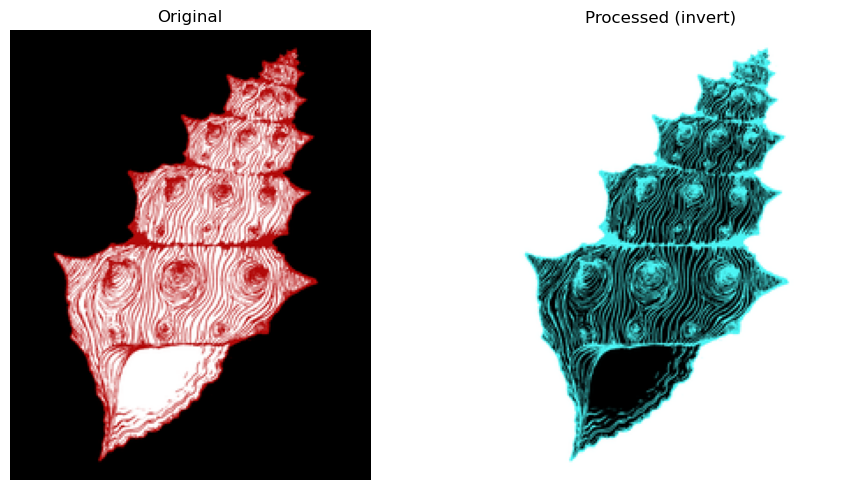

In [1]:
from Filtering_function import apply_filter
import matplotlib.pyplot as plt

# Ruta de la imagen de entrada
image_path = r"C:\Users\User\Pictures\Portafolio en bruto\Concha-LineArt-triValent.jpg"  # Reemplázalo con la ruta real de tu imagen

# Aplicar el filtro
filter_type = "invert"  # Cambia a "blur" o "invert" para probar otros filtros
result = apply_filter(image_path, filter_type=filter_type)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(result.original_image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(result.processed_image, cmap="gray" if filter_type == "grayscale" else None)
axes[1].set_title(f"Processed ({filter_type})")
axes[1].axis("off")

plt.tight_layout()
plt.show()


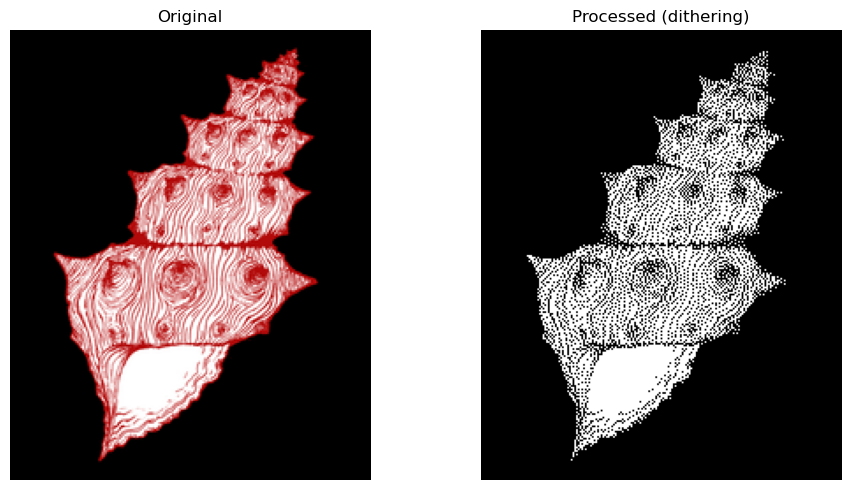

In [3]:
# from Filtering_function import apply_filter

# image_path = "path_to_your_image.jpg"  # Ruta de tu imagen
result = apply_filter(image_path, filter_type="dithering")
# result.processed_image.show()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(result.original_image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(result.processed_image, cmap="gray" if filter_type == "grayscale" else None)
axes[1].set_title(f"Processed (dithering)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


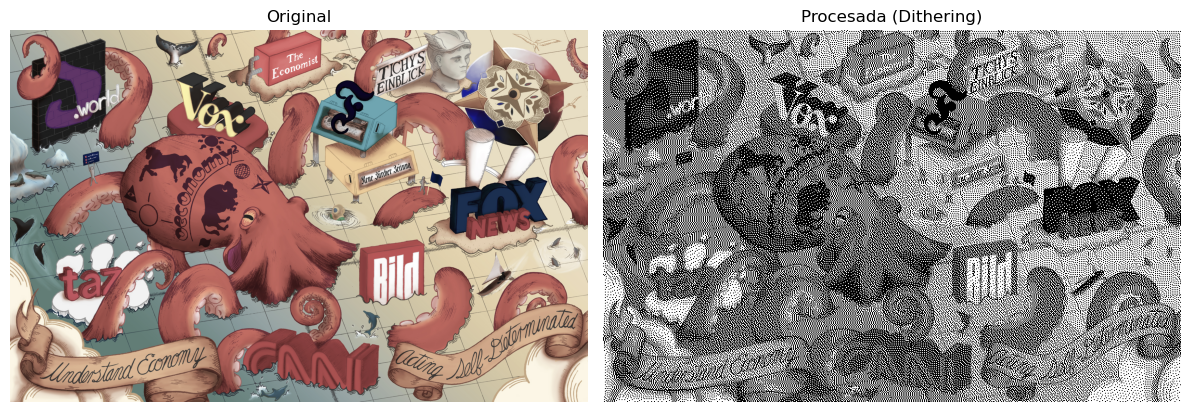

Metadata: {'original_size': (3108, 2000), 'resized_size': (623, 401), 'filter_steps': ['grayscale', 'level correction', 'banding', 'dithering']}


In [11]:
from Filtering_function import apply_filter
import matplotlib.pyplot as plt

image_path = r"C:\Users\User\Pictures\Portafolio en bruto\Octopus-Banner_smallPreview.jpg"  # Ruta a tu imagen

# Aplicar el filtro
result = apply_filter(image_path, max_area=500*500) #256*256)

# Mostrar las imágenes con Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axes[0].imshow(result.original_image)
axes[0].set_title("Original")
axes[0].axis("off")

# Imagen procesada
axes[1].imshow(result.processed_image, cmap="gray")
axes[1].set_title("Procesada (Dithering)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Mostrar metadata
print("Metadata:", result.metadata)
result.processed_image.show()


In [2]:
%%bash

# Verificar si Pillow está instalado y mostrar su versión
echo "Verificando la versión de Pillow..."
pillow_version=$(python -c "import PIL; print(PIL.__version__)" 2>/dev/null)

if [ $? -eq 0 ]; then
    echo "Pillow está instalado. Versión actual: $pillow_version"
else
    echo "Pillow no está instalado."
fi

# Desinstalar Pillow si está instalado
if [ ! -z "$pillow_version" ]; then
    echo "Desinstalando Pillow..."
    pip uninstall -y pillow
    if [ $? -eq 0 ]; then
        echo "Pillow desinstalado con éxito."
    else
        echo "Error al desinstalar Pillow."
        exit 1
    fi
fi

# Instalar nuevamente Pillow
echo "Instalando Pillow..."
pip install pillow
if [ $? -eq 0 ]; then
    echo "Pillow instalado con éxito."
    echo "Versión instalada:"
    python -c "import PIL; print(PIL.__version__)"
else
    echo "Error al instalar Pillow."
    exit 1
fi


Verificando la versión de Pillow...
Pillow está instalado. Versión actual: 10.2.0
Desinstalando Pillow...
Found existing installation: pillow 10.2.0
Uninstalling pillow-10.2.0:
  Successfully uninstalled pillow-10.2.0
Pillow desinstalado con éxito.
Instalando Pillow...
   ---------------------------------------- 2.6/2.6 MB 12.6 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imgviz 0.11.1 requires Pillow<7,>=5.3.0, but you have pillow 11.1.0 which is incompatible.


Pillow instalado con éxito.
Versión instalada:
11.1.0
